In [18]:
# 夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をMeCabを使って形態素解析し，
# その結果をneko.txt.mecabというファイルに保存せよ．
# このファイルを用いて，以下の問に対応するプログラムを実装せよ．

import requests

r = requests.get("https://nlp100.github.io/data/neko.txt", auth=('user','pass'))
r.status_code
r.headers['content-type']
r.encoding
with open("../data/neko.txt",mode='w') as f:
    f.write(r.text)

In [1]:
#import MeCab
#chasen = MeCab.Tagger("")
#chasen.parse("")
#with open("../data/neko.txt") as f:
#    with open("../data/neko.txt.mecab",mode='w') as w_f:
#        read_f = f.read()
#        w_f.write(chasen.parse(read_f))

## 30. 形態素解析結果の読み込み

In [2]:
# 形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．
# ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，
# 1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

## 新しい   形容詞,自立,*,*,形容詞・イ段,基本形,新しい,アタラシイ,アタラシイ
## surface:新しい   pos:形容詞   pos1:自立 pos2:   pos3:   cform:形容詞・イ段    ctype:基本形 base:新しい  read:アタラシイ    pron:アタラシイ

with open("../data/neko.txt.mecab",mode='r') as r_f:
    text = r_f.read().split("\n")
    
result = []
for t_line in text:
    if t_line == 'EOS':
        continue
    t_array = t_line.split('\t')
    surface = t_array[0]
    key = t_array[1].split(",")
    dic = {'surface':surface, 'base':key[6], 'pos':key[0], 'pos1':key[1]}
    result.append(dic)
#result

## 31. 動詞

In [9]:
# 動詞の表層形をすべて抽出せよ．
ans = []
for text_dic in result:
    if text_dic['pos'] == "動詞":
        ans.append(text_dic['surface'])
        
print(len(set(ans)))

3892


## 32. 動詞の基本形

In [10]:
# 動詞の基本形をすべて抽出せよ．
ans = []
for text_dic in result:
    if text_dic['pos'] == "動詞":
        ans.append(text_dic['base'])
len(set(ans))

2298

## 33. 「AのB」

In [13]:
ans = []
for index in range(len(result)):
    if (result[index]['pos1'] == "連体化") and (result[index]['surface'] == "の"):
        if (result[index-1]['pos'] == "名詞") and (result[index+1]['pos'] == "名詞"):
            ans.append(result[index-1]["surface"]+result[index]["surface"]+result[index+1]["surface"])

len(set(ans))

4927

## 34. 名詞の連接

In [9]:
ans_1 = []
ans = []
for d in result:
    if d['pos'] == '名詞':
        ans_1.append(d['surface'])
    else:
        if len(ans_1) >= 2:
            ans_1_str = "".join(ans_1)
            ans.append(ans_1_str)
            ans_1 = []
        else:
            ans_1 = []

## 35. 単語の出現頻度

In [18]:
import collections

ans_1 = []
for d in result:
    ans_1.append(d['surface'])
ans = collections.Counter(ans_1)
#ans.most_common()

## 36. 頻度上位10語

In [6]:
#!pip install japanize_matplotlib

[<BarContainer object of 1 artists>,
 <BarContainer object of 1 artists>,
 <BarContainer object of 1 artists>,
 <BarContainer object of 1 artists>,
 <BarContainer object of 1 artists>,
 <BarContainer object of 1 artists>,
 <BarContainer object of 1 artists>,
 <BarContainer object of 1 artists>,
 <BarContainer object of 1 artists>,
 <BarContainer object of 1 artists>]

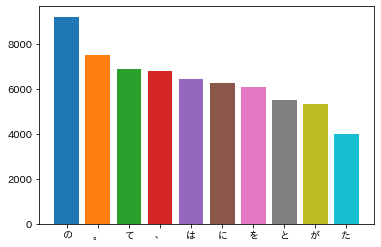

In [5]:
import collections
import matplotlib.pyplot as plt
import japanize_matplotlib
ans_1 = []
for d in result:
    ans_1.append(d['surface'])
ans_2 = collections.Counter(ans_1)
ans_3 = ans_2.most_common(10)
[ plt.bar(word,count) for word, count in ans_3]

## 37. 「猫」と共起頻度の高い上位10語

In [15]:
ans = []
ans_1 = []
import collections
for count, dic in enumerate(result):
    if dic['surface'] == "猫":
        

[{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数'},
 {'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'},
 {'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'},
 {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
 {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'},
 {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'},
 {'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'},
 {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'},
 {'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '一般'},
 {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
 {'surface': 'まだ', 'base': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続'},
 {'surface': '無い', 'base': '無い', 'pos': '形容詞', 'pos1': '自立'},
 {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'},
 {'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'},
 {'surface': 'どこ', 'base': 'どこ', 'pos': '名詞', 'pos1': '代名詞'},
 {'surface': 'で', 'base': 'で', 'pos': '助詞', 'pos1': '格助詞'},
 {'surface': '生れ